In [2]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from rdkit.Chem import PandasTools

In [3]:
FILE_LOCATION = Path("../data/MalariaData_bioactivity.txt")

In [4]:
df = pd.read_table(FILE_LOCATION)

/var/folders/mr/bl2q5rxs0t3d8d8tn7wdcxz80000gp/T/ipykernel_73044/2337347344.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(FILE_LOCATION)


In [5]:
df.head()

,MOLREGNO,MOL_CHEMBL_ID,DOWNGRADED,CANONICAL_SMILES,STANDARD_INCHI,FULL_MWT,ALOGP,ACD_LOGP,ACD_LOGD,PSA,...,TARGET_TYPE,PREF_NAME,ORGANISM,TARGET_CHEMBL_ID,JOURNAL,YEAR,TITLE,PUBMED_ID,DOI,DOC_TYPE
0,23,CHEMBL6206,0,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,317.18,3.52,4.39,4.39,26.3,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET
1,23,CHEMBL6206,0,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,317.18,3.52,4.39,4.39,26.3,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET
2,23,CHEMBL6206,0,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,317.18,3.52,4.39,4.39,26.3,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET
3,23,CHEMBL6206,0,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,InChI=1S/C16H13BrO2/c17-10-12-8-9-15(16(18)19-...,317.18,3.52,4.39,4.39,26.3,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET
4,111,CHEMBL266459,0,[Na+].Cc1cc(CC(=O)[O-])n(C)c1C(=O)c2ccc(Cl)cc2,InChI=1S/C15H14ClNO3.Na/c1-9-7-12(8-13(18)19)1...,313.71,3.93,3.36,0.27,59.3,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,NaN,NaN,PubChem BioAssay data set,NaN,NaN,DATASET


In [83]:
df.shape

(532413, 44)

In [84]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
532408    False
532409    False
532410    False
532411    False
532412    False
Length: 532413, dtype: bool

In [85]:
df = df.drop_duplicates()

In [86]:
df.shape

(532413, 44)

In [87]:
df.columns

Index(['MOLREGNO', 'MOL_CHEMBL_ID', 'DOWNGRADED', 'CANONICAL_SMILES',
       'STANDARD_INCHI', 'FULL_MWT', 'ALOGP', 'ACD_LOGP', 'ACD_LOGD', 'PSA',
       'SRC_DESCRIPTION', 'ASSAY_DESCRIPTION', 'ASSAY_CATEGORY',
       'ASSAY_ORGANISM', 'ASSAY_TAX_ID', 'ASSAY_STRAIN', 'ASSAY_CHEMBL_ID',
       'ACTIVITY_ID', 'ASSAY_ID', 'DOC_ID', 'RECORD_ID', 'STANDARD_RELATION',
       'PUBLISHED_VALUE', 'PUBLISHED_UNITS', 'STANDARD_VALUE',
       'STANDARD_UNITS', 'STANDARD_FLAG', 'STANDARD_TYPE', 'ACTIVITY_COMMENT',
       'PUBLISHED_TYPE', 'DATA_VALIDITY_COMMENT', 'POTENTIAL_DUPLICATE',
       'PUBLISHED_RELATION', 'PCHEMBL_VALUE', 'TARGET_TYPE', 'PREF_NAME',
       'ORGANISM', 'TARGET_CHEMBL_ID', 'JOURNAL', 'YEAR', 'TITLE', 'PUBMED_ID',
       'DOI', 'DOC_TYPE'],
      dtype='object')

In [8]:
df.PCHEMBL_VALUE.notnull().sum()

np.int64(63419)

<Axes: xlabel='ASSAY_CATEGORY', ylabel='count'>

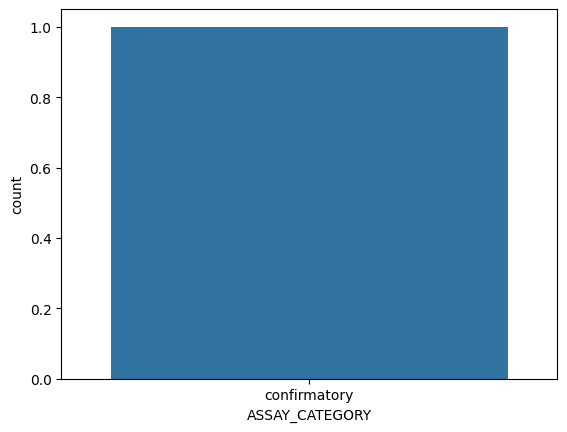

In [89]:
sns.countplot(df.ASSAY_CATEGORY.value_counts())

In [90]:
new_df = df[['MOLREGNO', 'CANONICAL_SMILES', 'ASSAY_DESCRIPTION', 'ASSAY_CATEGORY',
            'ASSAY_ORGANISM', 'STANDARD_VALUE', 'STANDARD_UNITS', 'PCHEMBL_VALUE', 
            'TARGET_TYPE', 'PREF_NAME', 'ORGANISM',]]

In [91]:
new_df

,MOLREGNO,CANONICAL_SMILES,ASSAY_DESCRIPTION,ASSAY_CATEGORY,ASSAY_ORGANISM,STANDARD_VALUE,STANDARD_UNITS,PCHEMBL_VALUE,TARGET_TYPE,PREF_NAME,ORGANISM
0,23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,PUBCHEM_BIOASSAY: qHTS for differential inhibi...,confirmatory,NaN,19952.60,nM,4.70,UNCHECKED,Unchecked,NaN
1,23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,PUBCHEM_BIOASSAY: qHTS for differential inhibi...,confirmatory,NaN,11220.20,nM,4.95,UNCHECKED,Unchecked,NaN
2,23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,PUBCHEM_BIOASSAY: qHTS for differential inhibi...,confirmatory,NaN,12589.30,nM,4.90,UNCHECKED,Unchecked,NaN
3,23,Br\C=C\1/CCC(C(=O)O1)c2cccc3ccccc23,PUBCHEM_BIOASSAY: qHTS for differential inhibi...,confirmatory,NaN,10000.00,nM,5.00,UNCHECKED,Unchecked,NaN
4,111,[Na+].Cc1cc(CC(=O)[O-])n(C)c1C(=O)c2ccc(Cl)cc2,PUBCHEM_BIOASSAY: Primary qHTS for delayed dea...,confirmatory,Plasmodium falciparum,13115.40,nM,NaN,ORGANISM,Plasmodium falciparum,Plasmodium falciparum
...,...,...,...,...,...,...,...,...,...,...,...
532408,1540450,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,Growth inhibition after 72 hrs of Plasmodium f...,NaN,Plasmodium falciparum,22.20,nM,7.65,ORGANISM,Plasmodium falciparum,Plasmodium falciparum
532409,1540450,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,GSK_TCMDC: Inhibition of Plasmodium falciparum...,NaN,Plasmodium falciparum,0.00,%,NaN,ORGANISM,Plasmodium falciparum,Plasmodium falciparum
532410,1540450,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,GSK_TCMDC: Inhibition of Plasmodium falciparum...,NaN,Plasmodium falciparum,100.00,%,NaN,ORGANISM,Plasmodium falciparum,Plasmodium falciparum
532411,1540450,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,GSK_TCMDC: Inhibition Frequency Index (IFI). T...,NaN,NaN,0.71,%,NaN,UNCHECKED,Unchecked,NaN


In [92]:
list(new_df.ASSAY_DESCRIPTION.unique())

['PUBCHEM_BIOASSAY: qHTS for differential inhibitors of proliferation of Plasmodium falciparum line 3D7. (Class of assay: confirmatory) [Related PubChem assays: 1815 (Assay for Plasmodium falciparum line 7G8), 1816 (Assay for Plasmodium falciparum line GB4), 1828 (Summary assay)]',
 'PUBCHEM_BIOASSAY: qHTS for differential inhibitors of proliferation of Plasmodium falciparum line W2. (Class of assay: confirmatory) [Related PubChem assays: 1815 (Assay for Plasmodium falciparum line 7G8), 1877 (Assay for Plasmodium falciparum line D10), 1816 (Assay for Plasmodium falciparum line GB4), 1876 (Assay for Plasmodium falciparum line 7D3), 1828 (Summary assay)]',
 'PUBCHEM_BIOASSAY: qHTS for differential inhibitors of proliferation of Plasmodium falciparum line 7G8. (Class of assay: confirmatory) ',
 'PUBCHEM_BIOASSAY: qHTS for differential inhibitors of proliferation of Plasmodium falciparum line GB4. (Class of assay: confirmatory) ',
 'PUBCHEM_BIOASSAY: Primary qHTS for delayed death inhibito

In [93]:
list(new_df.STANDARD_UNITS.unique())

['nM',
 nan,
 '%',
 'ug.mL-1',
 'ng/ml',
 'days',
 'mg kg-1 day-1',
 'um',
 'mg Kg-1',
 'mg kg-1',
 'day',
 'mg.kg-1',
 'ug ml-1',
 'nM hr',
 'mg kg-1 day-1 x 5',
 'mg/kg/day',
 'mg ml-1',
 'uM kg-1',
 'ng ml-1',
 'umol.kg-1',
 'mL.min-1.kg-1',
 "10'-8mol",
 'milliequivalent',
 'uM',
 'L.kg-1',
 'molar ratio',
 'hr',
 'ug well-1',
 'uM well-1',
 'Cures/total',
 'min-1',
 's-1',
 'M-1 s-1',
 'ng.hr/ml',
 'hr.ng/ml',
 'mg kg-1 day-1 x 4',
 'MST',
 'nM g-1',
 'ml/min',
 'l',
 'ng hr ml-1',
 'uM ml-1',
 'pM mg-1',
 'nM hr-1 mg-1',
 'mU mg-1',
 'nM mg-1',
 'mg mg-1',
 'hr-1',
 "10'6/M",
 "10'7/M",
 'mmHg',
 'uM hr',
 'min',
 'uL min-1 mg-1',
 "10'5/M",
 'ug',
 'M-1 min-1',
 'uM.min',
 'cpm/uL',
 'mL.min-1.g-1',
 'nm/s',
 '10-6 cm/s',
 '%,%',
 'g']

In [94]:
df.MOLREGNO.duplicated().sum()

np.int64(266106)

In [95]:
new_df["STANDARD_VALUE"].aggregate("mean")

np.float64(1263969.659520729)

In [96]:
su = new_df['STANDARD_UNITS']

su.head()

0    nM
1    nM
2    nM
3    nM
4    nM
Name: STANDARD_UNITS, dtype: object

In [97]:
units_df = pd.DataFrame(df[df["STANDARD_UNITS"].notnull()].groupby("MOLREGNO")["STANDARD_UNITS"].unique())

In [98]:
units_df["No Units"] = units_df['STANDARD_UNITS'].apply(lambda x: len(x))

In [99]:
units_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264366 entries, 23 to 1540450
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   STANDARD_UNITS  264366 non-null  object
 1   No Units        264366 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [100]:
units_df.rename(columns={"No Units": "no_units"}, inplace=True)

In [101]:
units_df

,STANDARD_UNITS,no_units
MOLREGNO,,
23,[nM],1
111,[nM],1
146,[nM],1
147,[nM],1
148,"[nM, %, ug.mL-1, ng/ml]",4
...,...,...
1531021,[ug.mL-1],1
1531022,[ug.mL-1],1
1531023,[ug.mL-1],1


In [102]:
units_df.query("no_units != 1")

,STANDARD_UNITS,no_units
MOLREGNO,,
148,"[nM, %, ug.mL-1, ng/ml]",4
236,"[%, nM]",2
241,"[nM, %, ug.mL-1]",3
322,"[%, nM]",2
1024,"[nM, %]",2
...,...,...
1529184,"[%, nM]",2
1529185,"[nM, %]",2
1529186,"[%, nM]",2


In [103]:
units_df[units_df.STANDARD_UNITS.apply(lambda x: "%" in x)]

,STANDARD_UNITS,no_units
MOLREGNO,,
148,"[nM, %, ug.mL-1, ng/ml]",4
236,"[%, nM]",2
241,"[nM, %, ug.mL-1]",3
322,"[%, nM]",2
1024,"[nM, %]",2
...,...,...
1529184,"[%, nM]",2
1529185,"[nM, %]",2
1529186,"[%, nM]",2


In [107]:
n_units_count

no_units
1     241542
2      21629
3        980
4        130
5         58
6         10
9          3
7          3
10         3
8          2
11         2
15         1
25         1
14         1
12         1
Name: count, dtype: int64

<BarContainer object of 15 artists>

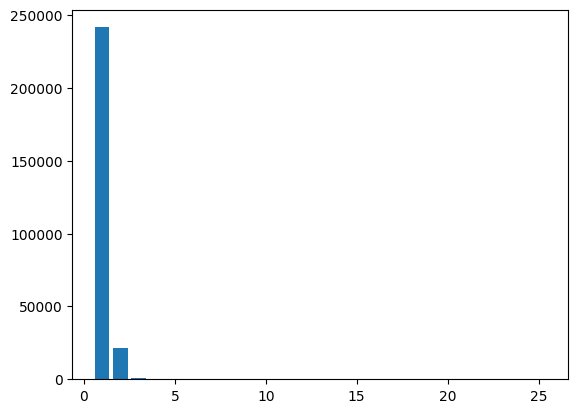

In [114]:
n_units_count = units_df.no_units.value_counts()
plt.bar(n_units_count.index, height=n_units_count.values, )

In [115]:
units_df.query("no_units > 4")

,STANDARD_UNITS,no_units
MOLREGNO,,
2080,"[nM, ug.mL-1, days, %, um, mg Kg-1, mg kg-1 da...",8
6579,"[nM, %, ug.mL-1, mg kg-1, day, days, mg.kg-1, ...",25
6936,"[nM, ug.mL-1, mg kg-1 day-1, %, mg.kg-1, days,...",15
9459,"[%, ug.mL-1, nM, days, um]",5
10389,"[ug.mL-1, nM, days, day, umol.kg-1, %, mg/kg/d...",10
...,...,...
1203056,"[mL.min-1.g-1, ug.mL-1, hr, %, nM]",5
1264978,"[day, mg kg-1, mg.kg-1, nM, %]",5
1281805,"[nM, uM.min, mg kg-1, mg.kg-1, hr]",5


In [116]:
df.query("MOLREGNO == 2080")

,MOLREGNO,MOL_CHEMBL_ID,DOWNGRADED,CANONICAL_SMILES,STANDARD_INCHI,FULL_MWT,ALOGP,ACD_LOGP,ACD_LOGD,PSA,...,TARGET_TYPE,PREF_NAME,ORGANISM,TARGET_CHEMBL_ID,JOURNAL,YEAR,TITLE,PUBMED_ID,DOI,DOC_TYPE
542,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,SINGLE PROTEIN,Dihydrofolate reductase,Plasmodium falciparum K1,CHEMBL1939,J. Med. Chem.,2004.0,NaN,15293997.0,NaN,PUBLICATION
543,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,ORGANISM,Plasmodium falciparum (isolate K1 / Thailand),Plasmodium falciparum K1,CHEMBL612856,Bioorg. Med. Chem. Lett.,2005.0,NaN,15780626.0,NaN,PUBLICATION
544,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,ORGANISM,Plasmodium berghei,Plasmodium berghei,CHEMBL612653,J. Med. Chem.,1984.0,NaN,6502605.0,NaN,PUBLICATION
545,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,ORGANISM,Plasmodium falciparum (isolate K1 / Thailand),Plasmodium falciparum K1,CHEMBL612856,Bioorg. Med. Chem. Lett.,2005.0,NaN,15878272.0,NaN,PUBLICATION
546,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,Science,2010.0,NaN,20813948.0,NaN,PUBLICATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,Antimicrob. Agents Chemother.,2007.0,NaN,17875995.0,NaN,PUBLICATION
795,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,Antimicrob. Agents Chemother.,2010.0,NaN,20350951.0,NaN,PUBLICATION
796,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,SINGLE PROTEIN,Dihydrofolate reductase,Plasmodium falciparum K1,CHEMBL1939,J. Med. Chem.,2002.0,NaN,11881993.0,NaN,PUBLICATION
797,2080,CHEMBL36,0,CCc1nc(N)nc(N)c1c2ccc(Cl)cc2,InChI=1S/C12H13ClN4/c1-2-9-10(11(14)17-12(15)1...,248.71,2.75,2.75,2.55,77.81,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Bioorg. Med. Chem. Lett.,2008.0,NaN,18039570.0,NaN,PUBLICATION


In [117]:
df.DOC_TYPE.value_counts()

DOC_TYPE
DATASET        343366
PUBLICATION    189047
Name: count, dtype: int64

In [120]:
df.query("DOC_TYPE == 'DATASET'")["STANDARD_UNITS"].value_counts()

STANDARD_UNITS
nM               326679
%                  7695
ug.mL-1            5766
uM                 1050
hr                  248
mL.min-1.g-1        234
day                  65
nm/s                 16
10-6 cm/s            10
uL min-1 mg-1         7
min                   7
%,%                   3
Name: count, dtype: int64

In [121]:
df.query("DOC_TYPE == 'PUBLICATION'")["STANDARD_UNITS"].value_counts()

STANDARD_UNITS
%                    80021
nM                   72203
ug.mL-1               5315
days                  3317
mg.kg-1                593
day                    502
mg kg-1                409
um                     315
mg kg-1 day-1          244
ng ml-1                200
uM well-1              104
Cures/total             94
mg/kg/day               79
hr                      70
ug ml-1                 58
mg kg-1 day-1 x 5       46
uM                      40
umol.kg-1               39
ug well-1               24
ng.hr/ml                23
uM kg-1                 23
ng/ml                   20
milliequivalent         20
mg Kg-1                 12
pM mg-1                 12
min-1                   11
M-1 s-1                 10
s-1                     10
mg ml-1                  9
L.kg-1                   9
mL.min-1.kg-1            9
cpm/uL                   8
molar ratio              8
nM hr                    6
mU mg-1                  6
l                        6
mg kg-1 day-1

In [ ]:
df.query("STANDARD_UNITS == '%'")

,MOLREGNO,MOL_CHEMBL_ID,DOWNGRADED,CANONICAL_SMILES,STANDARD_INCHI,FULL_MWT,ALOGP,ACD_LOGP,ACD_LOGD,PSA,...,TARGET_TYPE,PREF_NAME,ORGANISM,TARGET_CHEMBL_ID,JOURNAL,YEAR,TITLE,PUBMED_ID,DOI,DOC_TYPE
23,148,CHEMBL6246,0,Oc1cc2C(=O)Oc3c(O)c(O)cc4C(=O)Oc(c1O)c2c34,InChI=1S/C14H6O8/c15-5-1-3-7-8-4(14(20)22-11(7...,302.19,1.58,0.24,-3.38,133.52,...,ORGANISM,Plasmodium vinckei petteri,Plasmodium vinckei petteri,CHEMBL613012,Antimicrob. Agents Chemother.,2009.0,NaN,19015354.0,NaN,PUBLICATION
57,148,CHEMBL6246,0,Oc1cc2C(=O)Oc3c(O)c(O)cc4C(=O)Oc(c1O)c2c34,InChI=1S/C14H6O8/c15-5-1-3-7-8-4(14(20)22-11(7...,302.19,1.58,0.24,-3.38,133.52,...,ORGANISM,Plasmodium vinckei petteri,Plasmodium vinckei petteri,CHEMBL613012,Antimicrob. Agents Chemother.,2009.0,NaN,19015354.0,NaN,PUBLICATION
68,236,CHEMBL6229,0,CCc1cc2c(Sc3nnc(N)s3)ncnc2s1,InChI=1S/C10H9N5S3/c1-2-5-3-6-7(16-5)12-4-13-8...,295.41,2.85,2.81,2.81,159.36,...,CELL-LINE,HepG2,Homo sapiens,CHEMBL395,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
69,236,CHEMBL6229,0,CCc1cc2c(Sc3nnc(N)s3)ncnc2s1,InChI=1S/C10H9N5S3/c1-2-5-3-6-7(16-5)12-4-13-8...,295.41,2.85,2.81,2.81,159.36,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
71,236,CHEMBL6229,0,CCc1cc2c(Sc3nnc(N)s3)ncnc2s1,InChI=1S/C10H9N5S3/c1-2-5-3-6-7(16-5)12-4-13-8...,295.41,2.85,2.81,2.81,159.36,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532402,1540450,CHEMBL2364559,0,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,InChI=1S/C20H24N2O2.ClH/c1-3-13-12-22-9-7-14(1...,360.88,2.73,2.82,0.98,45.59,...,UNCHECKED,Unchecked,NaN,CHEMBL612545,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
532407,1540450,CHEMBL2364559,0,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,InChI=1S/C20H24N2O2.ClH/c1-3-13-12-22-9-7-14(1...,360.88,2.73,2.82,0.98,45.59,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
532409,1540450,CHEMBL2364559,0,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,InChI=1S/C20H24N2O2.ClH/c1-3-13-12-22-9-7-14(1...,360.88,2.73,2.82,0.98,45.59,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION
532410,1540450,CHEMBL2364559,0,Cl.COc1ccc2nccc([C@@H](O)[C@@H]3CC4CCN3C[C@@H]...,InChI=1S/C20H24N2O2.ClH/c1-3-13-12-22-9-7-14(1...,360.88,2.73,2.82,0.98,45.59,...,ORGANISM,Plasmodium falciparum,Plasmodium falciparum,CHEMBL364,Nature,2010.0,NaN,20485427.0,10.1038/nature09107,PUBLICATION


In [ ]:
units_df = units_df.join(
    pd.DataFrame(df[df["STANDARD_UNITS"].notnull()].groupby(
        "MOLREGNO"
        )["ASSAY_DESCRIPTION"].unique()))

In [ ]:
list(units_df.query("no_units != 1")["ASSAY_DESCRIPTION"])

[array(['Inhibition of Plasmodium falciparum thioredoxin reductase by DTNB assay',
        'PUBCHEM_BIOASSAY: Primary qHTS for delayed death inhibitors of the malarial parasite plastid, 96 hour incubation.   (Class of assay: confirmatory) [Related pubchem assays (depositor defined):AID488745, AID488752, AID488774, AID504848, AID504850]',
        'Antiplasmodial activity against chloroquine-resistant Plasmodium falciparum K1',
        'Antiplasmodial activity against Plasmodium vinckei petteri infected in Swiss mouse assessed as inhibition of parasite growth at 50 mg/kg/day, ip measured on day 4 postinfection',
        'Antiplasmodial activity against Plasmodium falciparum Dd2',
        'PUBCHEM_BIOASSAY: Primary qHTS for delayed death inhibitors of the malarial parasite plastid, 48 hour incubation.   (Class of assay: confirmatory) [Related pubchem assays (depositor defined):AID488752, AID488774, AID504848, AID504850]',
        'Antiplasmodial activity against Plasmodium falciparum W2',

In [ ]:
new_df["Agg Standard Val"] = new_df["STANDARD_VALUE"].aggregate(mean)

/var/folders/mr/bl2q5rxs0t3d8d8tn7wdcxz80000gp/T/ipykernel_96627/1629321367.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  new_df["Agg Standard Val"] = new_df["STANDARD_VALUE"].aggregate(sum)


TypeError: 'DataFrameGroupBy' object does not support item assignment

In [ ]:
df.query("ASSAY_CATEGORY == 'confirmation'")

,MOLREGNO,MOL_CHEMBL_ID,DOWNGRADED,CANONICAL_SMILES,STANDARD_INCHI,FULL_MWT,ALOGP,ACD_LOGP,ACD_LOGD,PSA,...,TARGET_TYPE,PREF_NAME,ORGANISM,TARGET_CHEMBL_ID,JOURNAL,YEAR,TITLE,PUBMED_ID,DOI,DOC_TYPE


In [ ]:
df['ASSAY_DESCRIPTION']

0         PUBCHEM_BIOASSAY: qHTS for differential inhibi...
1         PUBCHEM_BIOASSAY: qHTS for differential inhibi...
2         PUBCHEM_BIOASSAY: qHTS for differential inhibi...
3         PUBCHEM_BIOASSAY: qHTS for differential inhibi...
4         PUBCHEM_BIOASSAY: Primary qHTS for delayed dea...
                                ...                        
532408    Growth inhibition after 72 hrs of Plasmodium f...
532409    GSK_TCMDC: Inhibition of Plasmodium falciparum...
532410    GSK_TCMDC: Inhibition of Plasmodium falciparum...
532411    GSK_TCMDC: Inhibition Frequency Index (IFI). T...
532412    Growth inhibition after 72 hrs of Plasmodium f...
Name: ASSAY_DESCRIPTION, Length: 532413, dtype: object